In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import kstest
from ipywidgets import interact

# De un conjunto de datos a distribuciones

## Histogramas

In [2]:
df = pd.read_csv("../data/data.csv", index_col=0, parse_dates=True)
df

,Set1,Set2
Fecha,,
2023-01-01 00:00:00,2.573525,3.130862
2023-01-01 01:00:00,10.038197,6.499461
2023-01-01 02:00:00,6.356871,6.632775
2023-01-01 03:00:00,5.581570,8.527606
2023-01-01 04:00:00,9.477755,6.155952
...,...,...
2023-01-30 19:00:00,11.040725,6.746344
2023-01-30 20:00:00,7.429675,5.318878
2023-01-30 21:00:00,3.381201,8.987160


(array([ 1.,  0.,  3.,  1.,  1.,  6., 13., 21., 22., 48., 48., 58., 71.,
        67., 79., 60., 58., 46., 45., 27., 18., 15.,  5.,  2.,  2.,  2.,
         1.,  0.,  0.]),
 array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
         5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
        11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5]),
 <BarContainer object of 29 artists>)

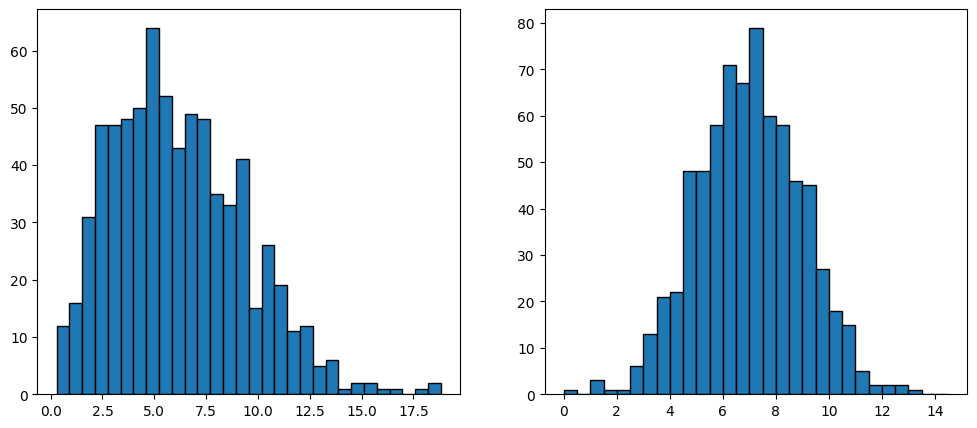

In [3]:
fig, ax = plt.subplots(ncols=2, figsize=(12,5))
ax[0].hist(df.Set1, ec="k", bins=30)
# ax[1].hist(df.Set2, ec="k", bins=10)
# ax[1].hist(df.Set2, ec="k", bins=[0,2,4,6,8,10,12,14])
ax[1].hist(df.Set2, ec="k", bins=np.arange(0,15,0.5))

### ¿Cómo seleccionar el número de Bins?
![bin_size.png](../figs/bin_size.png)

In [4]:
IQR_1 = df.Set1.quantile(0.75) - df.Set1.quantile(0.25)
h_1 = (2.3*IQR_1)/len(df)**(1/3)
h_1

1.1719912569930602

In [5]:
bins_1 = np.arange(df.Set1.min(), df.Set1.max(), h_1)
bins_1

array([ 0.28407078,  1.45606204,  2.62805329,  3.80004455,  4.97203581,
        6.14402706,  7.31601832,  8.48800958,  9.66000084, 10.83199209,
       12.00398335, 13.17597461, 14.34796586, 15.51995712, 16.69194838,
       17.86393963])

(array([ 1.,  0.,  3.,  1.,  1.,  6., 13., 21., 22., 48., 48., 58., 71.,
        67., 79., 60., 58., 46., 45., 27., 18., 15.,  5.,  2.,  2.,  2.,
         1.,  0.,  0.]),
 array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
         5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
        11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5]),
 <BarContainer object of 29 artists>)

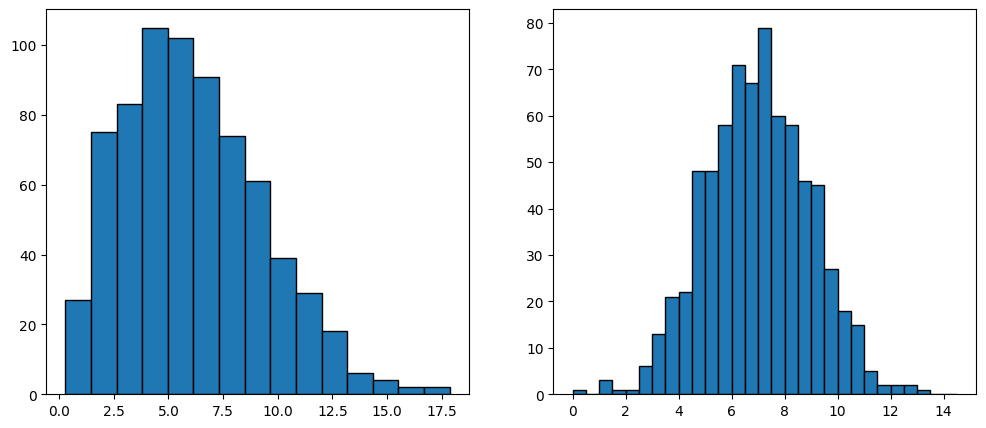

In [6]:
fig, ax = plt.subplots(ncols=2, figsize=(12,5))
ax[0].hist(df.Set1, ec="k", bins=bins_1)
# ax[1].hist(df.Set2, ec="k", bins=10)
# ax[1].hist(df.Set2, ec="k", bins=[0,2,4,6,8,10,12,14])
ax[1].hist(df.Set2, ec="k", bins=np.arange(0,15,0.5))

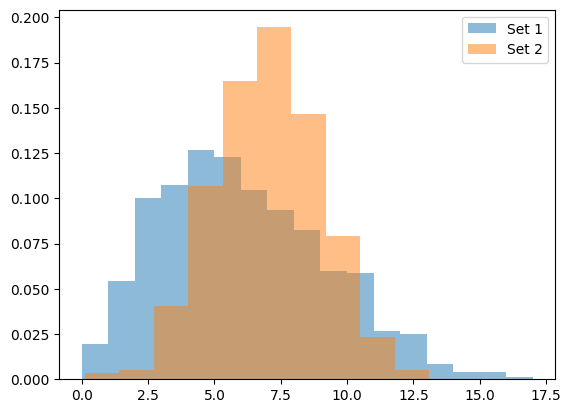

In [7]:
fig, ax = plt.subplots()
hist_1 = ax.hist(df.Set1, density=True, alpha=0.5, label="Set 1", bins=np.arange(0,18,1))
hist_2 = ax.hist(df.Set2, density=True, alpha=0.5, label="Set 2")
ax.legend()

### ¿Qué significa la densidad de probabilidad?:
    If ``True``, draw and return a probability density: each bin
    will display the bin's raw count divided by the total number of
    counts *and the bin width*
    (``density = counts / (sum(counts) * np.diff(bins))``),
    so that the area under the histogram integrates to 1
    (``np.sum(density * np.diff(bins)) == 1``).

In [8]:
hist_1

(array([0.0195258 , 0.05439331, 0.10041841, 0.10739191, 0.12691771,
        0.12273361, 0.10460251, 0.09344491, 0.08228731, 0.05997211,
        0.05857741, 0.0264993 , 0.0251046 , 0.0083682 , 0.0041841 ,
        0.0041841 , 0.0013947 ]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17.]),
 <BarContainer object of 17 artists>)

In [9]:
hist_1[0].sum()

1.0

In [10]:
(np.diff(hist_2[1])*hist_2[0]).sum()

0.9999999999999999

## Distribuciones de probabilidad

### Características de una Función de Densidad de Probabilidad (PDF):
1. **No Negatividad**: 
   - La PDF  $f(x)$ es siempre no negativa para todos los valores de $x$. Esto significa que $f(x) \geq 0$ para todo $x$.

2. **Integral Total Igual a 1**:
   - La integral de la PDF sobre todo el espacio es igual a 1. Esto asegura que la probabilidad total de todos los eventos posibles es 1.
   $$\int_{-\infty}^{\infty} f(x) \, dx = 1$$

3. **Probabilidad de un Intervalo**:
   - La probabilidad de que una variable aleatoria $X$ caiga en un intervalo $[a, b]$ se calcula integrando la PDF sobre ese intervalo:
   $$ P(a \leq X \leq b) = \int_{a}^{b} f(x) \, dx $$


**Distribución normal:** $$f(x) = \frac{1}{\sigma\sqrt{2\pi}}exp\left[-\frac{(x-\mu)^2}{2\sigma^2}\right]$$

In [11]:
def normal(x, mean, std):
    term1 = 1/(std*np.sqrt((2*np.pi)))
    term2 = np.exp((x-mean)**2/(-2*std**2))
    return term1*term2

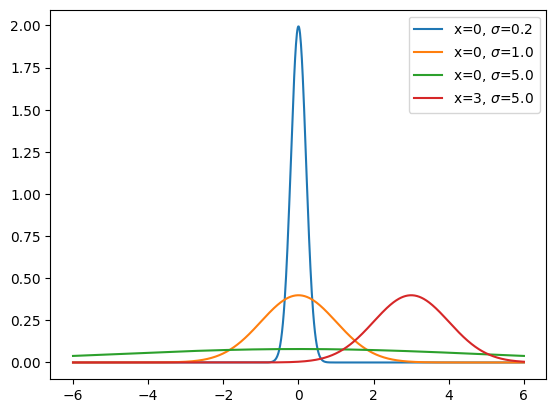

In [12]:
fig, ax = plt.subplots()
x = np.linspace(-6,6,1000)
ax.plot(x, normal(x, mean=0, std=0.2), label="x=0, $\sigma$=0.2")
ax.plot(x, normal(x, mean=0, std=1.0), label="x=0, $\sigma$=1.0")
ax.plot(x, normal(x, mean=0, std=5.0), label="x=0, $\sigma$=5.0")
ax.plot(x, normal(x, mean=3, std=1.0), label="x=3, $\sigma$=5.0")
ax.legend()

In [13]:
np.trapz(normal(x, mean=0, std=0.2), x)

1.0

In [14]:
np.trapz(normal(x, mean=0, std=1.0), x)

0.9999999980259482

In [15]:
np.trapz(normal(x, mean=0, std=5.0), x)

0.769860435406138

In [16]:
x = np.linspace(-5,5,1000)
np.trapz(normal(x, mean=0, std=5.0), x)


0.6826893305001359

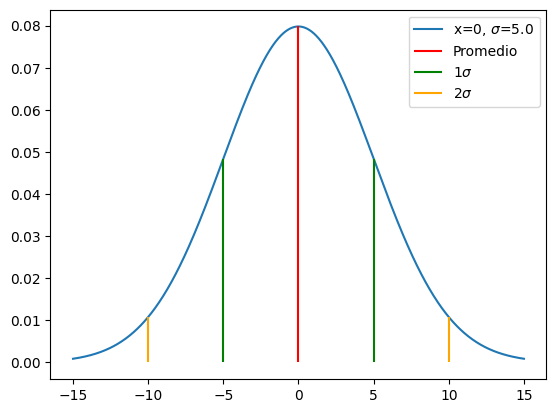

In [17]:
x = np.linspace(-15,15,1000)

fig, ax = plt.subplots()
ax.plot(x, normal(x, mean=0, std=5.0), label="x=0, $\sigma$=5.0")
ax.vlines(0, 0, normal(0, mean=0, std=5.0), label = "Promedio", color="red")
ax.vlines(5, 0, normal(5, mean=0, std=5.0), label = "1$\sigma$", color="green")
ax.vlines(-5, 0, normal(-5, mean=0, std=5.0), color="green")
ax.vlines(10, 0, normal(10, mean=0, std=5.0), label = "2$\sigma$", color="orange")
ax.vlines(-10, 0, normal(-10, mean=0, std=5.0), color="orange")
ax.legend()

### La PDF de un conjunto de datos

In [18]:
mean_1 = df.Set1.mean()
std_1  = df.Set1.std()
min_1  = df.Set1.min()
max_1  = df.Set1.max()
x_1 = np.linspace(min_1, max_1, 100)

In [19]:
normal_1 = normal(x_1, mean_1, std_1)

In [20]:
normal_1

array([2.30773997e-02, 2.56504553e-02, 2.84130087e-02, 3.13655793e-02,
       3.45066931e-02, 3.78326976e-02, 4.13375962e-02, 4.50129078e-02,
       4.88475582e-02, 5.28278080e-02, 5.69372205e-02, 6.11566763e-02,
       6.54644356e-02, 6.98362516e-02, 7.42455375e-02, 7.86635841e-02,
       8.30598315e-02, 8.74021874e-02, 9.16573925e-02, 9.57914253e-02,
       9.97699405e-02, 1.03558734e-01, 1.07124224e-01, 1.10433946e-01,
       1.13457035e-01, 1.16164710e-01, 1.18530723e-01, 1.20531787e-01,
       1.22147954e-01, 1.23362948e-01, 1.24164437e-01, 1.24544241e-01,
       1.24498470e-01, 1.24027594e-01, 1.23136432e-01, 1.21834070e-01,
       1.20133707e-01, 1.18052435e-01, 1.15610947e-01, 1.12833200e-01,
       1.09746024e-01, 1.06378687e-01, 1.02762438e-01, 9.89300228e-02,
       9.49151988e-02, 9.07522402e-02, 8.64754614e-02, 8.21187561e-02,
       7.77151656e-02, 7.32964823e-02, 6.88928939e-02, 6.45326745e-02,
       6.02419251e-02, 5.60443658e-02, 5.19611815e-02, 4.80109187e-02,
      

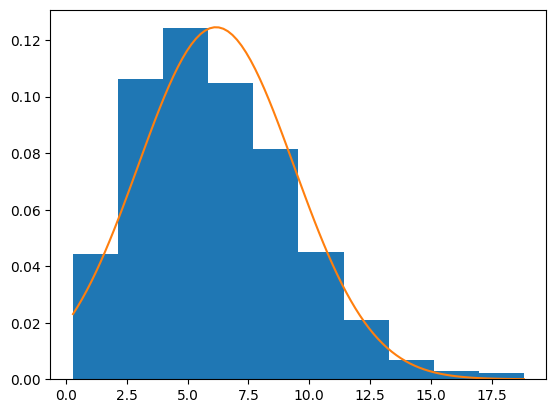

In [21]:
fig, ax = plt.subplots()
plt.hist(df.Set1, density=True)
plt.plot(x_1, normal_1)

In [22]:
mean_2 = df.Set2.mean()
std_2  = df.Set2.std()
min_2  = df.Set2.min()
max_2  = df.Set2.max()
x_2 = np.linspace(min_2, max_2, 100)
normal_2 = normal(x_2, mean_2, std_2)

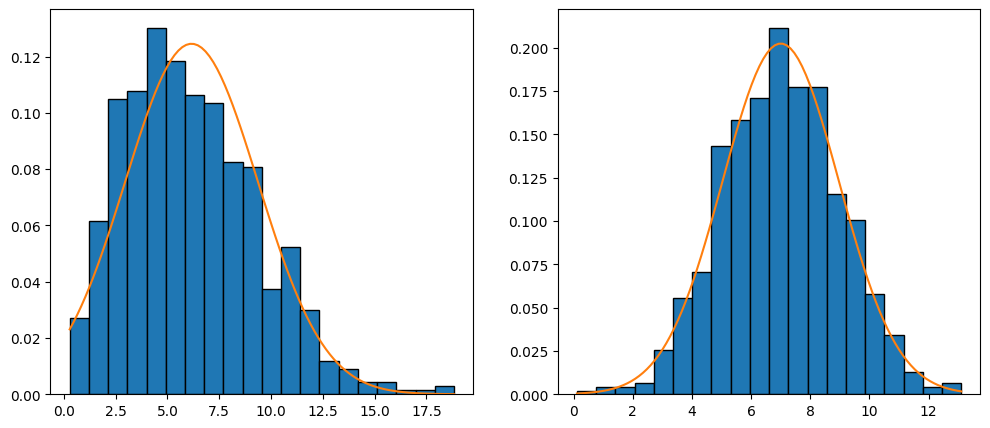

In [23]:
fig, ax = plt.subplots(ncols=2, figsize=(12,5))
ax[0].hist(df.Set1, density=True, bins=20, ec="k")
ax[0].plot(x_1, normal_1)

ax[1].hist(df.Set2, density=True, bins=20, ec="k")
ax[1].plot(x_2, normal_2)

https://docs.scipy.org/doc/scipy/reference/stats.html

| Distribución        | Ecuación de la PDF                                                                                                                                                            | Parámetros                                                                               |
|---------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------|
| **Normal**          | $f(x \mid \mu, \sigma) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}$                                                                                     | $\mu$ (media), $\sigma$ (desviación estándar)                                           |
| **Lognormal**       | $f(x \mid \mu, \sigma) = \frac{1}{x \sigma \sqrt{2\pi}} e^{-\frac{(\ln(x) - \mu)^2}{2\sigma^2}}$                                                                              | $\mu$ (media del logaritmo), $\sigma$ (desviación estándar del logaritmo)               |
| **Gamma**           | $f(x \mid k, \theta) = \frac{x^{k-1} e^{-x/\theta}}{\theta^k \Gamma(k)}$                                                                                                      | $k$ (forma), $\theta$ (escala)                                                          |
| **Exponencial**     | $f(x \mid \lambda) = \lambda e^{-\lambda x}$                                                                                                                                  | $\lambda$ (tasa)                                                                        |
| **Chi-cuadrada**    | $f(x \mid k) = \frac{x^{k/2-1} e^{-x/2}}{2^{k/2} \Gamma(k/2)}$                                                                                                                | $k$ (grados de libertad)                                                                |
| **Pearson III**     | $f(x \mid k, \mu, \sigma) = \frac{1}{\Gamma(k)} \left( \frac{x - \mu}{\sigma} \right)^{k-1} e^{-\frac{x - \mu}{\sigma}}$                                                      | $k$ (forma), $\mu$ (ubicación), $\sigma$ (escala)                                       |
| **Beta**            | $f(x \mid \alpha, \beta) = \frac{x^{\alpha-1} (1-x)^{\beta-1}}{B(\alpha, \beta)}$                                                                                             | $\alpha$ (forma), $\beta$ (forma)                                                       |
| **GEV**             | $f(x \mid \xi, \mu, \sigma) = \frac{1}{\sigma} \left[ 1 + \xi \left( \frac{x - \mu}{\sigma} \right) \right]^{-\frac{1}{\xi} - 1} e^{-\left[ 1 + \xi \left( \frac{x - \mu}{\sigma} \right) \right]^{-\frac{1}{\xi}}}$ | $\xi$ (forma), $\mu$ (ubicación), $\sigma$ (escala)                                     |
| **Gumbel**          | $f(x \mid \mu, \beta) = \frac{1}{\beta} e^{-(\frac{x - \mu}{\beta} + e^{-\frac{x - \mu}{\beta}})}$                                                                            | $\mu$ (ubicación), $\beta$ (escala)                                                     |
| **Weibull**         | $f(x \mid \lambda, k) = \frac{k}{\lambda} \left( \frac{x}{\lambda} \right)^{k-1} e^{-\left( \frac{x}{\lambda} \right)^k}$                                                     | $\lambda$ (escala), $k$ (forma)                                                         |
| **Exponencial mixta** | $f(x \mid p, \lambda_1, \lambda_2) = p \lambda_1 e^{-\lambda_1 x} + (1 - p) \lambda_2 e^{-\lambda_2 x}$                                                                     | $p$ (mezcla), $\lambda_1$ (tasa 1), $\lambda_2$ (tasa 2)                                |


### Distribución Weibull


$$ f(x \mid \lambda, k) = \frac{k}{\lambda} \left( \frac{x}{\lambda} \right)^{k-1} e^{-\left( \frac{x}{\lambda} \right)^k} $$


### Ajustando funciones con scipy

In [24]:
# Definir el intervalo de x
x_1 = np.linspace(min_1, max_1, 720)

# Ajustar la funcion a nuestros datos
wpar_1 = stats.weibull_min.fit(df.Set1)
print(wpar_1)

# Obtener los puntos de la PDF
weibull_1 = stats.weibull_min.pdf(x_1, wpar_1[0], wpar_1[1], wpar_1[2])
# print(weibull_1)

(1.9638365792669061, 0.13718056719751398, 6.797635495534717)


In [25]:
def weibull_plot(forma, locacion, escala):
  plt.hist(df.Set1, density=True, bins=50, ec='k')
  plt.plot(x_1, stats.weibull_min.pdf(x_1, forma, locacion, escala))
  plt.ylim(0,.75)

In [26]:
interact(weibull_plot, forma=(0,10,0.5), locacion=(0,10,0.5), escala=(0,10,0.5))


interactive(children=(FloatSlider(value=5.0, description='forma', max=10.0, step=0.5), FloatSlider(value=5.0, …

<function __main__.weibull_plot(forma, locacion, escala)>

In [27]:
# Ajustar la funcion a nuestros datos
npar_1 = stats.norm.fit(df.Set1)
print(npar_1)

# Obtener los puntos de la PDF
normal_1 = stats.norm.pdf(x_1, npar_1[0], npar_1[1])
# print(weibull_1)

(6.16471381844857, 3.200148263874441)


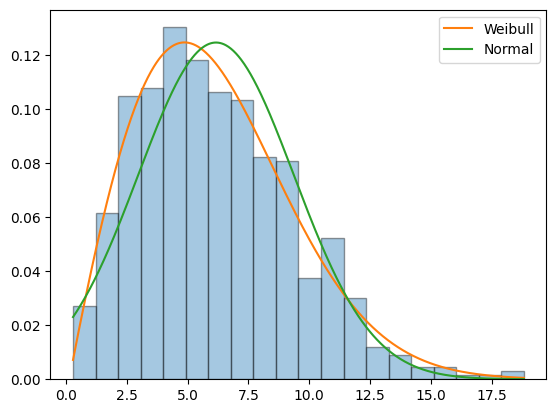

In [28]:
fig, ax = plt.subplots()
ax.hist(df.Set1, density=True, bins=20, ec="k",alpha=0.4)
ax.plot(x_1, weibull_1, label="Weibull")
ax.plot(x_1, normal_1, label="Normal")
ax.legend()

In [29]:
# Definir el intervalo de x
x_2 = np.linspace(min_2, max_2, 720)

# Ajustar la funcion a nuestros datos
wpar_2 = stats.weibull_min.fit(df.Set2)
print(wpar_2)

# Obtener los puntos de la PDF
weibull_2 = stats.weibull_min.pdf(x_2, wpar_2[0], wpar_2[1], wpar_2[2])
# print(weibull_1)

# Ajustar la funcion a nuestros datos
npar_2 = stats.norm.fit(df.Set2)
print(npar_2)

# Obtener los puntos de la PDF
normal_2 = stats.norm.pdf(x_2, npar_2[0], npar_2[1])
# print(weibull_1)

(3.770705062316523, 0.3178371135344362, 7.398577948981792)
(6.9987970914623245, 1.9689182185634269)


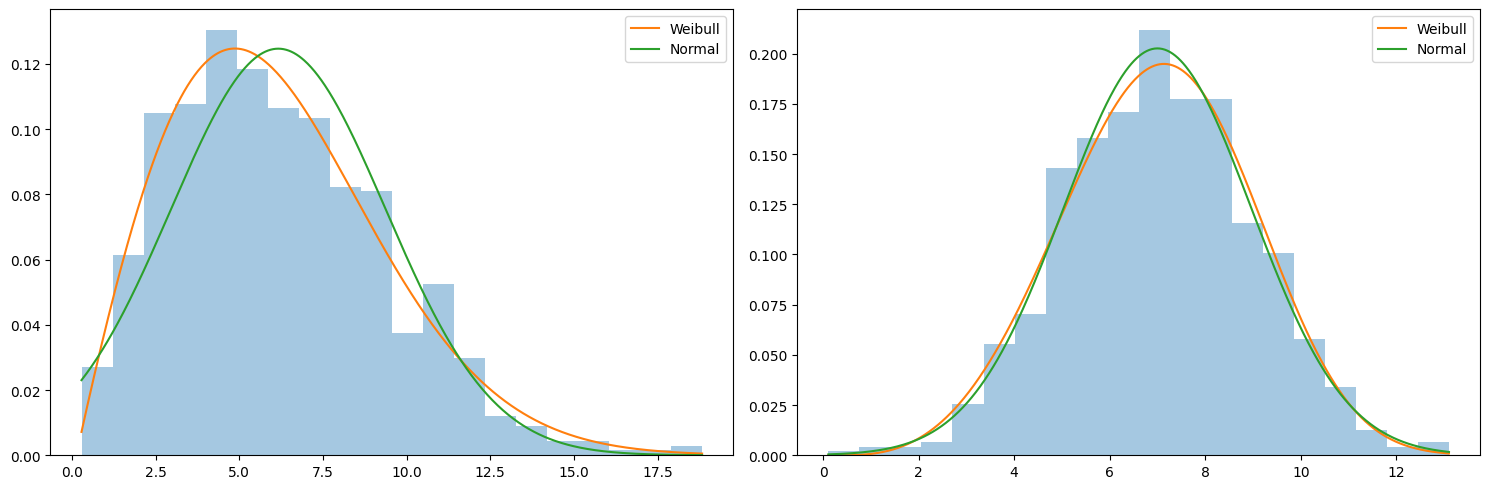

In [30]:
fig, ax = plt.subplots(ncols=2, figsize=(15,5))
ax[0].hist(df.Set1, density=True, bins=20, alpha=0.4)
ax[0].plot(x_1, weibull_1, label="Weibull")
ax[0].plot(x_1, normal_1, label="Normal")
ax[0].legend()

ax[1].hist(df.Set2, density=True, bins=20, alpha=0.4)
ax[1].plot(x_2, weibull_2, label="Weibull")
ax[1].plot(x_2, normal_2, label="Normal")
ax[1].legend()

plt.tight_layout()

In [31]:
### Estimación de máxima verosimilitud

### Criterios de mejor ajuste

### 1. Superposición

### 2. Q-Q plots


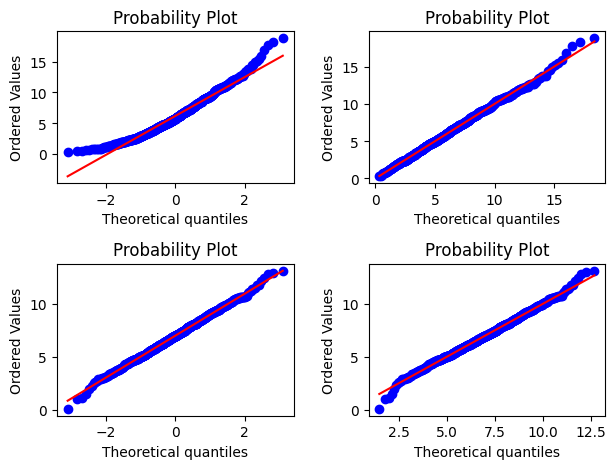

In [32]:
fig, ax = plt.subplots(ncols=2, nrows=2)
stats.probplot(df.Set1, dist="norm", plot=ax[0,0]);
stats.probplot(df.Set1, sparams=[wpar_1[0],wpar_1[1],wpar_1[2]], dist="weibull_min", plot=ax[0,1]);
stats.probplot(df.Set2, dist="norm", plot=ax[1,0]);
stats.probplot(df.Set2, sparams=[wpar_2[0],wpar_2[1],wpar_2[2]], dist="weibull_min", plot=ax[1,1]);
plt.tight_layout()

### 3. Kolmogorov-Smirnoff

### Definición del Estadístico KS

Para una muestra $\{X_1, X_2, \ldots, X_n\}$ y una distribución teórica con función de distribución acumulada $F(x)$, el estadístico KS se define como:

$$
D_n = \sup_x | F_n(x) - F(x) | 
$$

donde:
- $D_n$ es el estadístico KS para una muestra de tamaño $n$.
- $\sup$ representa el supremo, es decir, el máximo valor.
- $F_n(x)$ es la función de distribución acumulada empírica de la muestra.
- $F(x)$ es la función de distribución acumulada teórica.

![ks_example.png](../figs/ks_example.png)

In [33]:
data_sorted_1 = np.sort(df.Set1.values)
cdf_empirical_1 = np.arange(1, len(data_sorted_1) + 1) / len(data_sorted_1)

# Calcular las CDFs teóricas
cdf_normal_1 = stats.norm.cdf(data_sorted_1, npar_1[0], npar_1[1])
cdf_weibull_1 = stats.weibull_min.cdf(data_sorted_1, wpar_1[0], wpar_1[1], wpar_1[2])

# Realizar las pruebas KS
ks_statistic_normal_1, p_value_normal_1 = stats.kstest(df.Set1, 'norm', args=(npar_1[0], npar_1[1]))
ks_statistic_weibull_1, p_value_weibull_1 = stats.kstest(df.Set1, 'weibull_min', args=(wpar_1[0], wpar_1[1], wpar_1[2]))

#########
data_sorted_2 = np.sort(df.Set2.values)
cdf_empirical_2 = np.arange(1, len(data_sorted_2) + 1) / len(data_sorted_2)

# Calcular las CDFs teóricas
cdf_normal_2 = stats.norm.cdf(data_sorted_2, npar_2[0], npar_2[1])
cdf_weibull_2 = stats.weibull_min.cdf(data_sorted_2, wpar_2[0], wpar_2[1], wpar_2[2])

# Realizar las pruebas KS
ks_statistic_normal_2, p_value_normal_2 = stats.kstest(df.Set2, 'norm', args=(npar_2[0], npar_2[1]))
ks_statistic_weibull_2, p_value_weibull_2 = stats.kstest(df.Set2, 'weibull_min', args=(wpar_2[0], wpar_2[1], wpar_2[2]))

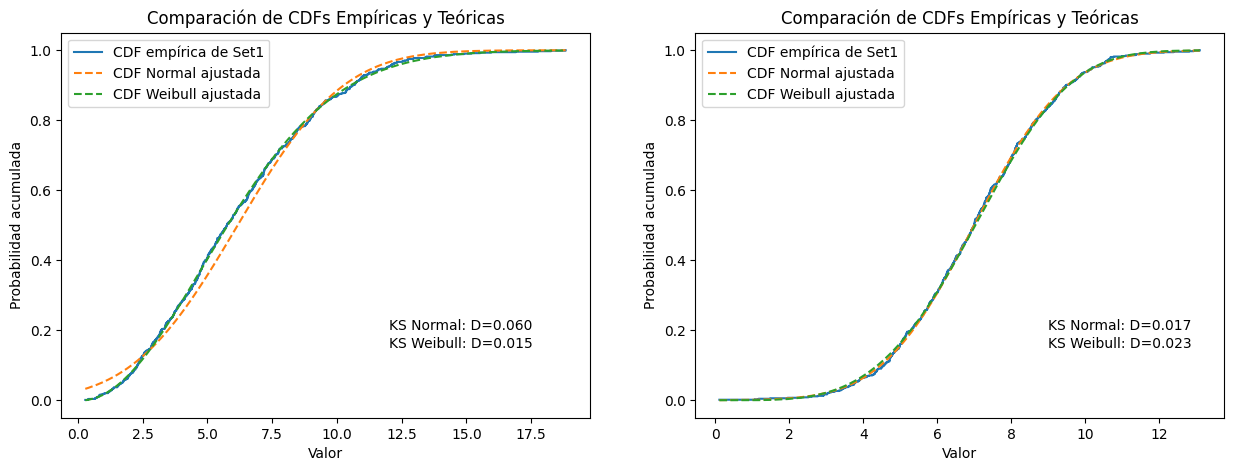

In [34]:
fig, ax = plt.subplots(ncols=2, figsize=(15,5))
# Graficar las CDFs
ax[0].step(data_sorted_1, cdf_empirical_1, label='CDF empírica de Set1', where='post')
ax[0].plot(data_sorted_1, cdf_normal_1, label='CDF Normal ajustada', linestyle='--')
ax[0].plot(data_sorted_1, cdf_weibull_1, label='CDF Weibull ajustada', linestyle='--')
ax[0].set_title('Comparación de CDFs Empíricas y Teóricas')
ax[0].set_xlabel('Valor')
ax[0].set_ylabel('Probabilidad acumulada')
ax[0].legend()

ax[0].text(12, 0.2, f'KS Normal: D={ks_statistic_normal_1:.3f}')
ax[0].text(12, 0.15, f'KS Weibull: D={ks_statistic_weibull_1:.3f}')

ax[1].step(data_sorted_2, cdf_empirical_2, label='CDF empírica de Set1', where='post')
ax[1].plot(data_sorted_2, cdf_normal_2, label='CDF Normal ajustada', linestyle='--')
ax[1].plot(data_sorted_2, cdf_weibull_2, label='CDF Weibull ajustada', linestyle='--')
ax[1].set_title('Comparación de CDFs Empíricas y Teóricas')
ax[1].set_xlabel('Valor')
ax[1].set_ylabel('Probabilidad acumulada')
ax[1].legend()

ax[1].text(9, 0.2, f'KS Normal: D={ks_statistic_normal_2:.3f}')
ax[1].text(9, 0.15, f'KS Weibull: D={ks_statistic_weibull_2:.3f}')

plt.show()